# Data Visualization with Plotly

As we reviewed earlier, a great way to convey the results of your data analysis is through clear and eye-catching data visualizations. There are several excellent data visualization Python packages that allow you to customize your displayed data in the best way possible, and in this course, we'll focus on using [Plotly](https://medium.com/plotly/plotly-py-4-0-is-here-offline-only-express-first-displayable-anywhere-fc444e5659ee). Although it's a relatively new data visualization package, we can pretty simply create interactive visualizations with only a few lines of code.

For these examples, we'll work with the [Instacart](https://www.instacart.com/datasets/grocery-shopping-2017) data that we used to explore pivot tables and VLOOKUP in Excel. 

## import packages 

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px

## import data 

The *order_products__prior.csv* dataset gives us a breakdown of the:  
 -  order ID number
 -  product ID numbers that were in that order
 -  the order the product was added to the customer's cart
 -  if the product was reordered (1). If the customer had not reordered or if this was their first order, this is coded as a 0

In [20]:
# order dataset
# this gives us a breakdown of the 
df_orders = pd.read_csv("instacart_data/order_products__prior.csv")

The *products.csv* dataset gives us a breakdown of the:  
 -  product ID number
 -  product name
 -  product's aisle ID number
 -  product's department ID number

In [4]:
# products dataset
df_products = pd.read_csv("instacart_data/products.csv")

The *aisles.csv* dataset gives us a breakdown of the:  
 - aisle ID number
 - aisle name

In [5]:
# aisles dataset
df_aisles = pd.read_csv("instacart_data/aisles.csv")

The *departments.csv* dataset gives us a breakdown of the: 
 -  department ID number
 -  department name

In [7]:
# departments dataset
df_dep = pd.read_csv("instacart_data/departments.csv")

## Cleaning and Merging Data 

To better understand what this data tells us, we want to build some data visualizations to understand the trends and distributions of customers' orders and the most and least common products, department, and aisle categories to better market to and serve these customers. 

This dataset is pretty clean to begin with, but one thing that we want to do in order to know what products, aisles, and departments the ID numbers correspond with is merge their names to the *order_products_prior.csv* dataframe. We'll do this with [pandas merge function](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.merge.html). There are several ways to merge and concatenate your data that are visually outlined [here](https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html). We'll use the following code block to merge two dataframes together: 

```
pd.merge(left_df, right_df, how='inner', on=None, left_on=None, right_on=None,
         left_index=False, right_index=False, sort=True,
         suffixes=('_x', '_y'), copy=True, indicator=False,
         validate=None)
```
Where the __left_df__ and __right_df__ are the two dataframes that you want to merge together (it doesn't matter which one is the left and right as long as this remains consistent in the rest of your parameters.

To perform a VLOOKUP in Excel, we type:
`=VLOOKUP(lookup_value, table_array, col_index_number, [range_index])`
The _lookup_value_ is essentially defining the *left_df* and the *table_array* is essentially defining the *right_df*. 

__how__ describes _how_ you're merging the dataframes together:
 - "inner" means that you're only merging the dataframes together on the values that are the same in __both__ dataframes. This also removes all data that isn't present in both dataframes. If you don't identify a _how_, then "inner" is the default merge function.
 - "outer" means that you're merging the dataframes on the values that are in both dataframes __and__ keeping the values in both dataframes that are not the same. The values in both left_df and right_df that don't have a match in the other dataset well have a NaN (not a number) in the row(s) where there is no match.
 - "right" means that you're merging the values from the left_df onto the right_df if they match. If there are rows in the right_df that don't have a match in the left_df, then these rows will have NaN (not a number) in the row where there is no match.
 - "left" means that you're merging the values from the right_df onto the left_df if they match. If there are rows in the left_df that don't have a match in the right_df, then these rows will have NaN (not a number) in the row where there is no match.

When we used VLOOKUP in Excel, we would essentially use a "right" or "left" merge depending on which Excel spreadsheet we use for our *lookup_value* and *table_array*.

__on, right_on, and left_on__ describe the columns on which you are merging the two columns:
 - use on = "column name" if both dataframes have the same column name to merge the values
 - use right_on = "right_df column name" and left_on = "left_df column name" if the right and left column names are different 

We want to merge the product, department, and aisle names onto the *order_products__prior* dataset where we use __df_orders__ as __right_df__ and __df_products, df_departments, and df_aisles__ as the __left_df__: 

In [21]:
# right now, our order dataset looks like this: 
df_orders.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [22]:
# and our products dataset looks like this: 
df_products.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [23]:
# we want to merge all of the data from df_products onto df_orders so that we can later merge the aisle and department names
df_orders = pd.merge(df_orders, df_products, how = "left", on = "product_id")

In [24]:
# so now our orders dataframe looks like this: 
df_orders.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id
0,2,33120,1,1,Organic Egg Whites,86,16
1,2,28985,2,1,Michigan Organic Kale,83,4
2,2,9327,3,0,Garlic Powder,104,13
3,2,45918,4,1,Coconut Butter,19,13
4,2,30035,5,0,Natural Sweetener,17,13


If we only wanted to add on one or more specific columns, we would identify these when we define the __right_df__ and __left_df__. For example, if we only wanted to add on the product name and the aisle name columns, we'd type the data that we merge on + the columns that we want to merge in two square brackets (e.g. right_df[["match_column", "column1_tomerge", "column2_tomerge"]]: 
```
df_orders = pd.merge(df_orders, df_products[["product_id", "aisle_id", "department_id"]], how = "left", on = "product_id")
```


In [25]:
# merge the department names onto our orders dataset
df_orders = pd.merge(df_orders, df_dep, how = "left", on = "department_id")

In [26]:
# merge the aisle names onto our orders dataset
df_orders = pd.merge(df_orders, df_aisles, how = "left", on = "aisle_id")

In [27]:
# now our dataframe looks like: 
df_orders.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,department,aisle
0,2,33120,1,1,Organic Egg Whites,86,16,dairy eggs,eggs
1,2,28985,2,1,Michigan Organic Kale,83,4,produce,fresh vegetables
2,2,9327,3,0,Garlic Powder,104,13,pantry,spices seasonings
3,2,45918,4,1,Coconut Butter,19,13,pantry,oils vinegars
4,2,30035,5,0,Natural Sweetener,17,13,pantry,baking ingredients


## Big-Picture Analysis 

Now we have all of the product, department, and aisle names merged into one dataset. Before we aggregate and manipulate our data and create some data visualizations, we probably want to get some big-picture findings about our data: 

In [28]:
# what does the dataframe look like?
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32434489 entries, 0 to 32434488
Data columns (total 9 columns):
order_id             int64
product_id           int64
add_to_cart_order    int64
reordered            int64
product_name         object
aisle_id             int64
department_id        int64
department           object
aisle                object
dtypes: int64(6), object(3)
memory usage: 2.4+ GB


In [29]:
# number of unique orders: 
df_orders["order_id"].nunique()

3214874

To manipulate and show our data in a useful way, it might be useful to get the number of unique items in all of the columns. While we can do this by typing the above line for each column name, this can get tedious--especially if we had to do this for more than 9 columns!). In some cases, when we want to perform the same funtion to different parts of our dataframe, we can implement a __Python for loop__, which essentially "loops" through a series of commands to every item in a given list. 

In [32]:
# This is how we can create a list of all of the column names in our dataframe
df_orders.columns.tolist()

['order_id',
 'product_id',
 'add_to_cart_order',
 'reordered',
 'product_name',
 'aisle_id',
 'department_id',
 'department',
 'aisle']

In [33]:
# Here, we'll use a for loop to print out the number of unique items in each column 

# for each column name in our list of column names (which we printed above)
for column in df_orders.columns.tolist():
    
    # create a variable that "stores" the number of unique items in that column (similar to what we did above)
    unique_num = df_orders[column].nunique()
    # print out the column name + : + the number of unique items in this column
    print(column + ": " + str(unique_num))

# the for loop will keep repeating this function (everything indented) until there are no more items in the column name list
    

order_id: 3214874
product_id: 49677
add_to_cart_order: 145
reordered: 2
product_name: 49677
aisle_id: 134
department_id: 21
department: 21
aisle: 134


We may want to first get an idea of the top 20 most ordered items for each of the product, department, and aisle categories. We can do this in two ways: 

1. Creating an aggregated table with the counts of the categories, and then sorting and filtering the count column
2. Adding an extra column with the count of that category and then sorting and filtering the count column

In both instances we'll utilize the __groupby__ function. This allows us to *group* our columns into different categories and then perform functions on them--similar to how we could group column or row data in Excel pivot tables. 

#### Aggregating Column Counts 

To aggregate our product column data by the number of items in each column, we'll use the following convention: 

`new_dataframe_name = old_data_frame_name.groupby("column_we_want_to_group_values_by")["column_we_want_to_perform_group_calculation_on"].agg(["function_we_want_to_perform"]).reset_index()`

In [34]:
# First, we'll aggregate the products column to see how many of each product were ordered in this data set
df_product_agg = df_orders.groupby("product_name")["order_id"].agg(["count"]).reset_index()

In [35]:
#preview our new dataframe
df_product_agg.head()

,product_name,count
0,#2 Coffee Filters,777
1,#2 Cone White Coffee Filters,13
2,#2 Mechanical Pencils,8
3,#4 Natural Brown Coffee Filters,241
4,& Go! Hazelnut Spread + Pretzel Sticks,164


In [36]:
# sort our dataframe to have the count column in descending order
df_product_agg = df_product_agg.sort_values(by = "count", ascending = False)

In [37]:
# look at the top 20 products ordered
df_product_agg.head(20)

,product_name,count
3676,Banana,472565
3471,Bag of Organic Bananas,379450
31920,Organic Strawberries,264683
28840,Organic Baby Spinach,241921
30297,Organic Hass Avocado,213584
28804,Organic Avocado,176815
22413,Large Lemon,152657
42904,Strawberries,142951
23420,Limes,140627
32478,Organic Whole Milk,137905


#### Adding Product Counts as an Extra Column 

Sometimes it might be more helpful to create a new column on our dataframe that lists the count, sum, or other calculation of another column in our dataset. For this we'll still use the __groupby__ function, but instead of __agg__-ing the values to groupby, we'll __transform__ them in a new column using the following convention: 

`dataframe_name["new_column_name"] = data_frame_name.groupby("column_we_want_to_group_values_by")["column_we_want_to_perform_group_calculation_on"].transform("count")`

In [38]:
# create a new column "product_count" in df_orders
df_orders["product_count"] = df_orders.groupby("product_id")["order_id"].transform("count")

In [39]:
# preview data
df_orders.head(3)

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,department,aisle,product_count
0,2,33120,1,1,Organic Egg Whites,86,16,dairy eggs,eggs,19400
1,2,28985,2,1,Michigan Organic Kale,83,4,produce,fresh vegetables,67449
2,2,9327,3,0,Garlic Powder,104,13,pantry,spices seasonings,6299


Since we haven't filtered our data for to only keep unique valuews, we'll also want to drop duplicated values with the same product name in order to see the top 20 ordered items using the following convention: 

`df = df.drop_duplicates(subset = "column to drop duplicates for", keep = "first", inplace = False)`

Where the 
 - __subset__ is the name of the column (or list of columns in square brackets) that we want to drop duplicates on
 - __keep__ is to identify whether we want to keep the "first," "last," or none (False) of the duplicates; default is _"first"_
 - __inplace__ is to identify whether we want to replace the dataframe with this "new" dropped duplicate data (True) or keep this manipulated data as a copy (False); default is _False_

In [42]:
df_product_filter = df_orders.drop_duplicates(subset = "product_count", keep = "first", inplace = False)

In [43]:
# sort our data by the product_count column similar to above
df_product_filter = df_product_filter.sort_values(by = "product_count", ascending = False)

In [44]:
# look at the top 20 ordered products
df_product_filter.head(20)

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,department,aisle,product_count
28566630,3012720,24852,4,0,Banana,24,4,produce,fresh fruits,472565
638628,67535,13176,1,0,Bag of Organic Bananas,24,4,produce,fresh fruits,379450
22562344,2379723,21137,11,0,Organic Strawberries,24,4,produce,fresh fruits,264683
23373205,2465149,21903,7,0,Organic Baby Spinach,123,4,produce,packaged vegetables fruits,241921
23975459,2528618,47209,10,0,Organic Hass Avocado,24,4,produce,fresh fruits,213584
12600416,1329869,47766,1,0,Organic Avocado,24,4,produce,fresh fruits,176815
22816713,2406652,47626,17,1,Large Lemon,24,4,produce,fresh fruits,152657
10904775,1151260,16797,3,1,Strawberries,24,4,produce,fresh fruits,142951
15745493,1661323,26209,8,0,Limes,24,4,produce,fresh fruits,140627
9807195,1035604,27845,2,1,Organic Whole Milk,84,16,dairy eggs,milk,137905


Aggregating dataframes can be useful if we don't need the extra data in our dataframes, but transforming data into a new column can be useful if we want to use the counts, sum, etc. as part of a larger analysis. Keep in mind that as our dataframe grows, it will become slower and more difficult to manage all of the data in our dataset.

## Data Visualizations with Plotly 

Now that we have a good idea of what our data tells us, we can make some interactive visualizations with Plotly to further explore and undertand what this data says. While there are many ways to use the Plotly package, the easiest way is to use this library is with their __[Plotly Express](https://plot.ly/python/plotly-express/)__ function. 

We'll review how to make bar, bubble, and pie charts with Plotly express, however, there are several more kinds of visualizations that you can make with plotly depending on how you want to display your data as shown in their newest [Medium](https://medium.com/plotly/plotly-py-4-0-is-here-offline-only-express-first-displayable-anywhere-fc444e5659ee) post and [Python tutorial gallery](https://plot.ly/python/).

To make a simple bar chart of the counts of the products ordered in this dataset we'll follow the convention: 

```
chart_name = px.bar(df, # dataframe of the data we want to plot
                     x = "column on the x axis", 
                     y = "column on the y axis", 
                     color = "how to categorize data with different colors", 
                     hover_name = "values we want to show up when we hover over the chart", 
                    title = "chart title", 
                    labels = {"column_name": "new label", "column_name": "new label"}) # renaming labels
```

In [48]:
# graphing the entire dataset will take a really long time (and won't really be effective with 49677 different products)

# we'll create a "new" dataframe of only the top 20 purchased foods: 

df_product_top20 = df_product_filter.head(20)

In [87]:
# graphing the product counts in df_product_top20: 

product_bar = px.bar(df_product_top20, # dataframe of the data we want to plot
                     x = "product_name", # column on the x axis
                     y = "product_count", # column on the y axis
                     color = "aisle", # how to categorize data with different colors
                     hover_name = "product_count", # values we want to show up when we hover over the chart 
                    title = "Number of Grocery Store Products Ordered from Instacart", 
                    labels = {"product_name": "Grocery Product", "department": "Grocery Department", 
                              "aisle": "Grocery Aisle", "product_count": "Number of Products Ordered"},# renaming labels
                    #orientation = "h" # change the x, y values to make a horizontal bar chart
                    )

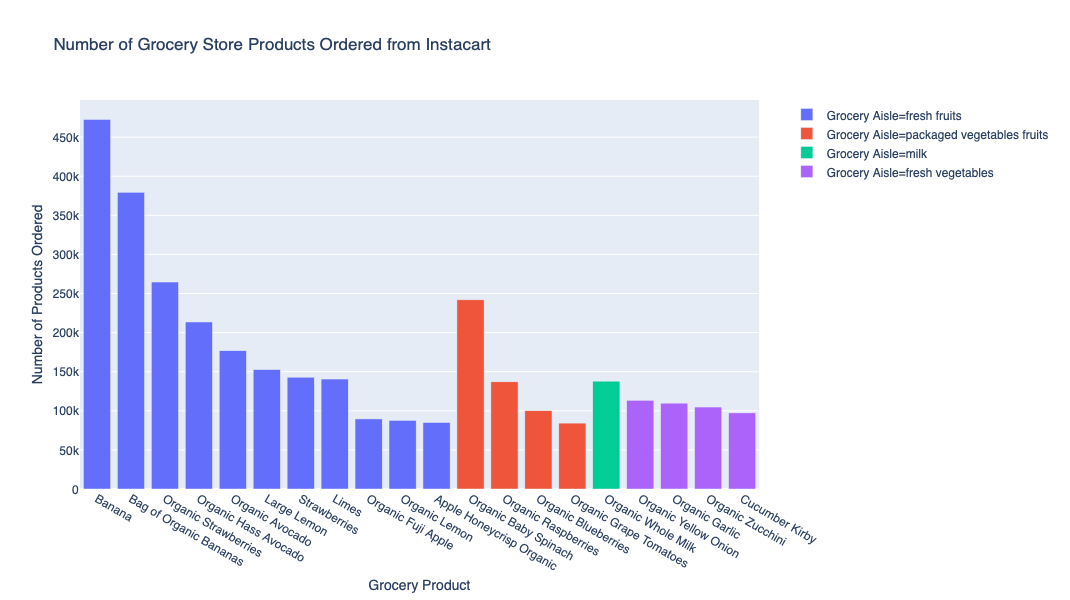

In [88]:
product_bar

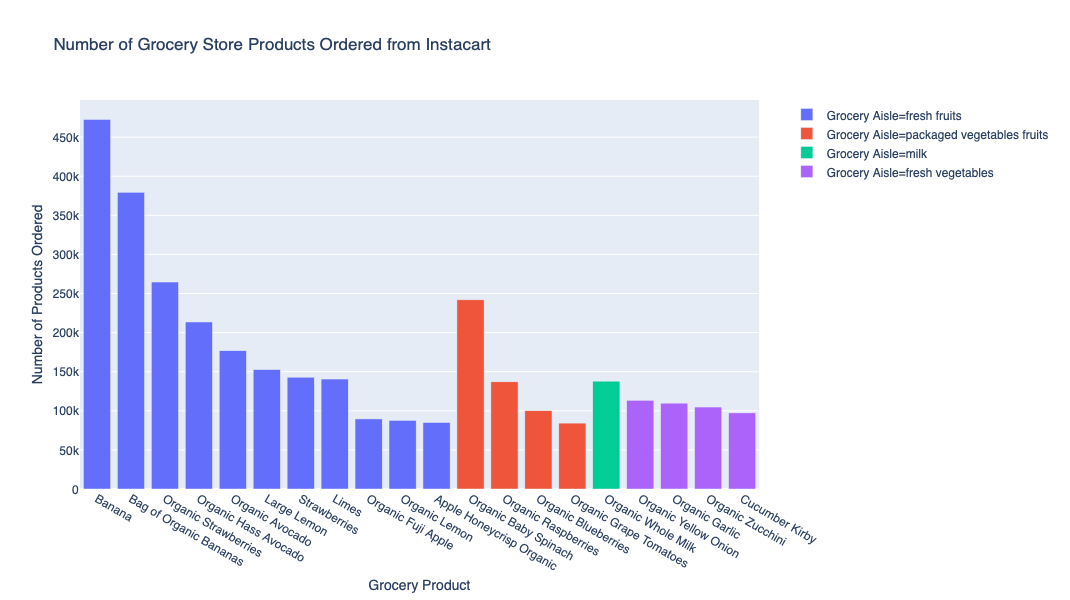

In [91]:
product_bar.update_layout(yaxis_categoryorder = "total ascending")